Remove Outliers with Deviation >= 3

In [1]:
import pandas as pd
import numpy as np
from pandas_summary import DataFrameSummary
from matplotlib import pyplot as plt

In [2]:
df_train = pd.read_feather('all_preprocessed_train.fth')
df_test = pd.read_feather('all_preprocessed_test.fth')

In [3]:
df_train.shape, df_test.shape

((1017209, 81), (41088, 80))

In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0


In [5]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [6]:
for i in df_train['Store'].unique():
    df_train.loc[(df_train['Store'] == i) & (df_train['Open'] == 1), 'Outlier'] = \
        mad_based_outlier(df_train.loc[(df_train['Store'] == i) & (df_train['Open'] == 1)]['Sales'], 3)

<ipython-input-5-dac065d3112a>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
<ipython-input-5-dac065d3112a>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
<ipython-input-5-dac065d3112a>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
<ipython-input-5-dac065d3112a>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
<ipython-input-5-dac065d3112a>:3

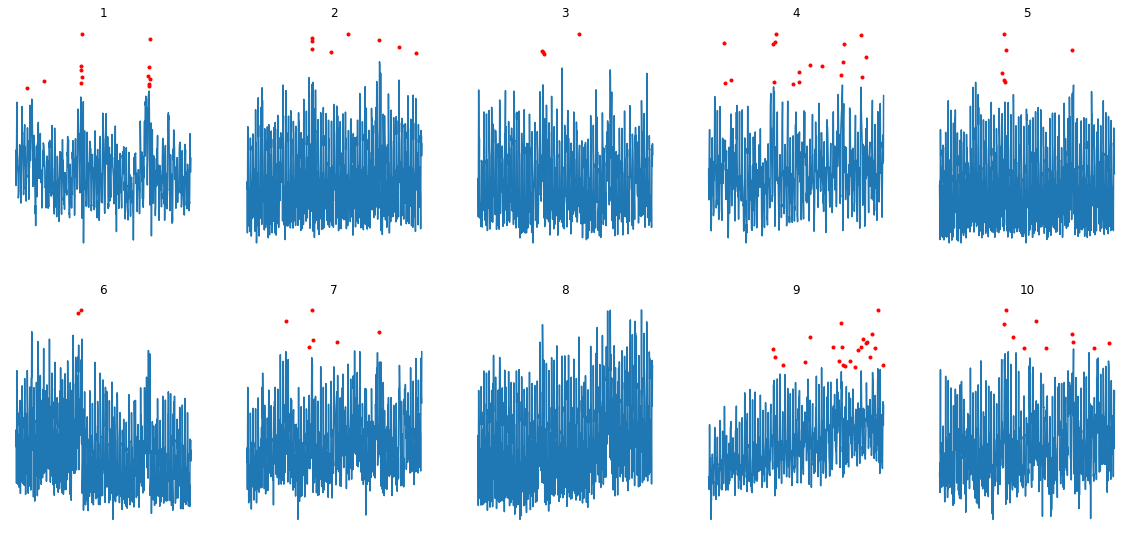

In [7]:
no_stores_to_check = 10

plt.rcParams["figure.figsize"] = [20,no_stores_to_check*5]

for i in range(1,no_stores_to_check+1):
    stor = i

    # Normal sales
    X1 = df_train.loc[(df_train['Store'] == stor) & (df_train['Open'] == 1) & (df_train['Outlier'] == False)]
    y1 = df_train.loc[(df_train['Store'] == stor) & (df_train['Open'] == 1) & (df_train['Outlier'] == False)]['Sales']

    # Outliers
    X2 = df_train.loc[(df_train['Store'] == stor) & (df_train['Open'] == 1) & (df_train['Outlier'] == True)]
    y2 = df_train.loc[(df_train['Store'] == stor) & (df_train['Open'] == 1) & (df_train['Outlier'] == True)]['Sales']

    Xt = df_train.loc[(df_train['Store'] == stor)]
    
    plt.subplot(10,5,i)
    plt.plot(X1['Date'], y1, '-')
    plt.plot(X2['Date'], y2, 'r.')
    plt.title(i)
    plt.axis('off')

In [8]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw,Outlier
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 82 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Store                       1017209 non-null  int64         
 1   DayOfWeek                   1017209 non-null  int64         
 2   Date                        1017209 non-null  datetime64[ns]
 3   Sales                       1017209 non-null  int64         
 4   Customers                   1017209 non-null  int64         
 5   Open                        1017209 non-null  int64         
 6   Promo                       1017209 non-null  int64         
 7   StateHoliday                1017209 non-null  object        
 8   SchoolHoliday               1017209 non-null  int64         
 9   Year                        1017209 non-null  int64         
 10  Month                       1017209 non-null  int64         
 11  Week                    

In [10]:
### Remove rows where store is open, but no sales.
df_train.drop(df_train.loc[df_train['Outlier']==True].index, inplace=True)
#df_train = df_train.loc[~(df_train['Outlier'] == True)]

In [11]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw,Outlier
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0,False


In [12]:
del df_train['Outlier']
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0


In [13]:
df_train.reset_index(drop=True).to_feather('all_preprocessed_with_Outlier_train.fth')